In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
#Constants

G = 6.67*10**-11 #Gravitational Constant
g = 9.81 #Gravity
Me = 5.9*10**24 #Mass of Earth
Mm = 7.3*10**22 #Mass of Moon
Ma = 5500 #Mass of Apollo Command Module
Re = 6378 #Radius of Earth
Rm = 1737 #Radius of Moon
Dem = 3.8 * 10**8 #Distance from Earth to Moon
VS1 = 2.4 * 10**3 #Exhaust velocity  Saturn 1
BS1 = 1.3* 10**4 #Burn rate Saturn 1
WS1 = 2.4 * 10**3 #Wet mass Saturn 1
DS1 = 7.5 * 10**5 #Dry mass Saturn 1

In [14]:
#1.1

#Potential at a distance r from a mass M
def PotentialEPoint (M, XM, YM, X, Y):
    r = np.sqrt(((XM-X)**2)+((YM-Y)**2))
    ans = (-G*M)/r
    return ans

C:\Users\MARTI\AppData\Local\Temp\ipykernel_23228\3176192172.py:6: RuntimeWarning: divide by zero encountered in divide
  ans = (-G*M)/r


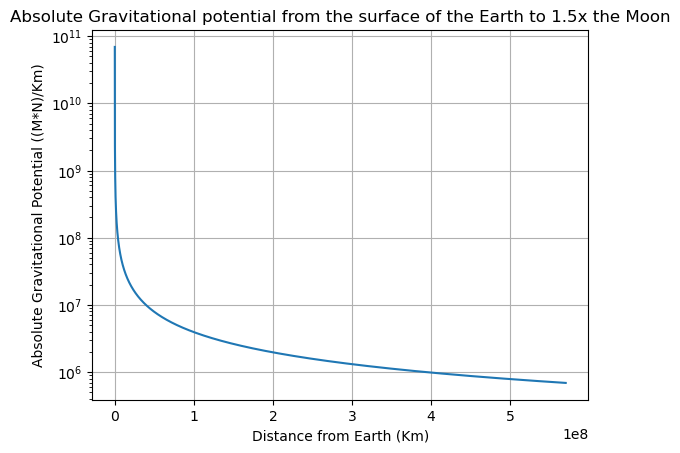

In [15]:
#1.2

#Make plot
fix, ax = plt.subplots()

#Get values
x = np.linspace(0, int(1.5*Dem), 10**5)
y = np.abs(PotentialEPoint(Me, 0, 0, x, 0))

#Plot plot
ax.plot(x,y)
ax.set_yscale("log")
ax.set_ylabel("Absolute Gravitational Potential ((M*N)/Km)")
ax.set_xlabel("Distance from Earth (Km)")
ax.set_title("Absolute Gravitational potential from the surface of the Earth to 1.5x the Moon")
ax.grid()

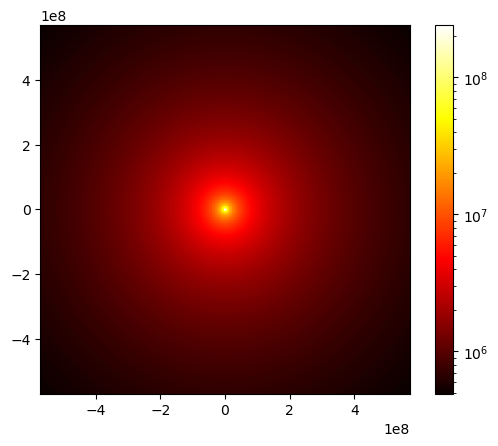

In [16]:
#1.3
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib import cm, ticker

#Values 
x = np.linspace(-1.5*Dem, 1.5*Dem, 500)
y = x.copy()

#Meshed
x_grid, y_grid = np.meshgrid(x,y)

#Phi value
Phi = np.abs(PotentialEPoint(Me, 0, 0, x_grid, y_grid))

#make plot
fig, ax = plt.subplots(1,1)
mesh = ax.pcolormesh(x_grid, y_grid, Phi, cmap = cm.hot, norm = colors.LogNorm())

#Set aspect
ax.set_aspect("equal")

#Color Bar
cbar = fig.colorbar(mesh)

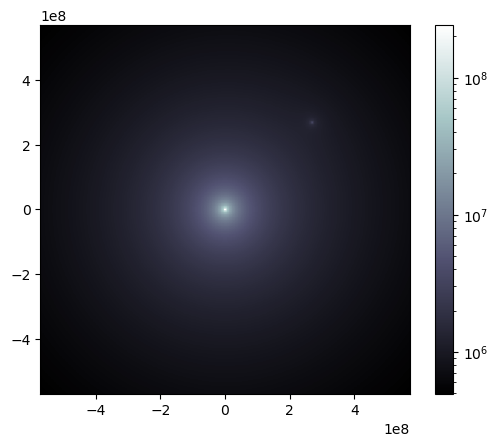

In [17]:
#2.1

#Coords
Xm = Dem/np.sqrt(2)
Ym = Xm.copy()

#Values 
x = np.linspace(-1.5*Dem, 1.5*Dem, 500)
y = x.copy()

#Meshed
x_grid, y_grid = np.meshgrid(x,y)

#Phis
Phi_Earth = np.abs(PotentialEPoint(Me, 0, 0, x_grid, y_grid))
Phi_Moon = np.abs(PotentialEPoint(Mm, 0, 0, x_grid-Xm, y_grid-Ym))
Phi_total = np.abs(-Phi_Earth-Phi_Moon)

#plots
fig, ax = plt.subplots(1,1)
mesh = ax.pcolormesh(x_grid, y_grid, Phi_total, cmap = cm.bone, norm = colors.LogNorm())

#Set aspect
ax.set_aspect("equal")

#Color Bar
cbar = fig.colorbar(mesh)

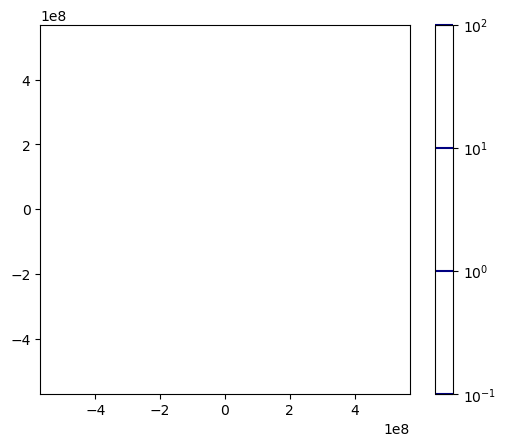

In [25]:
#2.2
from matplotlib import ticker
from matplotlib.colors import LogNorm

#Coords
Xm = Dem/np.sqrt(2)
Ym = Xm.copy()

#Values 
x = np.linspace(-1.5*Dem, 1.5*Dem, 100)
y = x.copy()

#Meshed
x_grid, y_grid = np.meshgrid(x,y)

#Phis
Phi_Earth = np.abs(PotentialEPoint(Me, 0, 0, x_grid, y_grid))
Phi_Moon = np.abs(PotentialEPoint(Mm, 0, 0, x_grid-Xm, y_grid-Ym))
Phi_total = np.abs(-Phi_Earth-Phi_Moon)

#plot
fig_contour, ax_contour = plt.subplots(1,1)
locator = ticker.LogLocator(base=10)
lvl = np.linspace(-1.5*Dem, 1.5*Dem, 500)
cntr = ax_contour.contour(x_grid, y_grid, np.log10(Phi_total), 50, cmap=cm.jet, norm = colors.LogNorm(vmin = 10**6, vmax = 10**8))
ax_contour.set_aspect("equal")
cbar = fig_contour.colorbar(cntr, ticks=locator)

In [21]:
#3.1

def GravitationalForces(M1, m2, x1, y1, x2, y2):
    #Calculate distance
    r21 = np.sqrt((x2-x1)**2+(y2-y1)**2)

    #calculate force
    f21 = (-G*M1*m2*r21)/(r21**2)

    #force components
    fx = (f21*(x2-x1))/r21
    fy = (f21*(y2-y1))/r21

    return fx, fy

ValueError: 'x' can have at maximum 2 dimensions

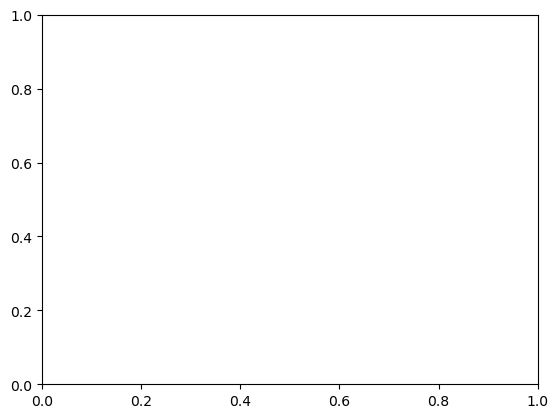

In [22]:
#3.2

# Ma mass of apollo 11 command module

#Coords
Xm = Dem/np.sqrt(2)
Ym = Xm.copy()

#Values 
x = np.linspace(-1.5*Dem, 1.5*Dem, 500)
y = x.copy()

#meshed
x_grid, y_grid = np.meshgrid(Xm,Ym)

#gravitational force of the eaeth mnoon system
Fx, Fy = GravitationalForces(Me, Mm, 0, 0, Xm, Ym)

#plot
fig, ax = plt.subplots(1,1)
stream = ax.streamplot(Fx, Fy, x_grid, y_grid)

                        
#theta = np.arctan2(fy, fx)
#print(fx, f21*np.cos(theta))
#print(fy, f21*np.sin(theta))